In [33]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_path = 'dataset/training_set'
test_path = 'dataset/test_set'


train_gen = ImageDataGenerator(rescale = 1.0/255, 
                               shear_range = 0.2, 
                               zoom_range = 0.2, 
                               horizontal_flip = True)

training_set = train_gen.flow_from_directory(train_path, 
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

test_gen = ImageDataGenerator(rescale = 1.0/255)

testing_set = test_gen.flow_from_directory(test_path, 
                                          target_size = (64,64),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()

model.add(Conv2D(input_shape = (64,64,3), filters = 32, padding = 'same', kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 64, padding = 'same', kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, kernel_regularizer = l2(0.01), activation = 'linear'))
# MULTI CLASSIFICATION
# model.add(Dense(num_classes, kernel_regularizer = l2(0.01), activation = 'softmax'))
# model.summary()

In [26]:
# BINARY CLASSIFICATION
# HINGE - SVM 
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
# for MULTI CLASSIFICATION
# model.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [34]:
result = model.fit(training_set, validation_data = testing_set,epochs = 5)

Epoch 1/5
250/250 [==============================] - 197s 790ms/step - loss: 0.7742 - accuracy: 0.6376 - val_loss: 0.6602 - val_accuracy: 0.6885
Epoch 2/5
250/250 [==============================] - 116s 464ms/step - loss: 0.6845 - accuracy: 0.6804 - val_loss: 0.6916 - val_accuracy: 0.7205
Epoch 3/5
250/250 [==============================] - 19s 78ms/step - loss: 0.6348 - accuracy: 0.7071 - val_loss: 0.5976 - val_accuracy: 0.7115
Epoch 4/5
250/250 [==============================] - 19s 78ms/step - loss: 0.5913 - accuracy: 0.7221 - val_loss: 0.5644 - val_accuracy: 0.7580
Epoch 5/5
250/250 [==============================] - 19s 78ms/step - loss: 0.5550 - accuracy: 0.7429 - val_loss: 0.6542 - val_accuracy: 0.7605


In [35]:
with tf.device('/GPU:0'):
    result = model.fit(training_set, validation_data = testing_set,epochs = 5)

Epoch 1/5
250/250 [==============================] - 20s 82ms/step - loss: 0.5373 - accuracy: 0.7510 - val_loss: 0.5433 - val_accuracy: 0.7495
Epoch 2/5
250/250 [==============================] - 20s 78ms/step - loss: 0.5122 - accuracy: 0.7675 - val_loss: 0.5235 - val_accuracy: 0.7620
Epoch 3/5
250/250 [==============================] - 20s 80ms/step - loss: 0.4979 - accuracy: 0.7706 - val_loss: 0.5853 - val_accuracy: 0.7865
Epoch 4/5
250/250 [==============================] - 20s 79ms/step - loss: 0.4806 - accuracy: 0.7801 - val_loss: 0.5165 - val_accuracy: 0.7710
Epoch 5/5
250/250 [==============================] - 20s 81ms/step - loss: 0.4608 - accuracy: 0.7897 - val_loss: 0.5561 - val_accuracy: 0.7935


In [39]:
result = model.fit(training_set, validation_data = testing_set,epochs = 50)

Epoch 1/50
250/250 [==============================] - 18s 73ms/step - loss: 0.3878 - accuracy: 0.8234 - val_loss: 0.5362 - val_accuracy: 0.7970
Epoch 2/50
250/250 [==============================] - 18s 71ms/step - loss: 0.3719 - accuracy: 0.8329 - val_loss: 0.4930 - val_accuracy: 0.7830
Epoch 3/50
250/250 [==============================] - 18s 70ms/step - loss: 0.3574 - accuracy: 0.8386 - val_loss: 0.5747 - val_accuracy: 0.7940
Epoch 4/50
250/250 [==============================] - 18s 73ms/step - loss: 0.3450 - accuracy: 0.8508 - val_loss: 0.4855 - val_accuracy: 0.8000
Epoch 5/50
250/250 [==============================] - 17s 69ms/step - loss: 0.3331 - accuracy: 0.8556 - val_loss: 0.5140 - val_accuracy: 0.8055
Epoch 6/50
250/250 [==============================] - 20s 80ms/step - loss: 0.3173 - accuracy: 0.8616 - val_loss: 0.4983 - val_accuracy: 0.8050
Epoch 7/50
250/250 [==============================] - 24s 98ms/step - loss: 0.3058 - accuracy: 0.8666 - val_loss: 0.5694 - val_accuracy:

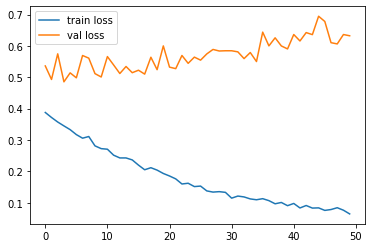

In [40]:
import matplotlib.pyplot as plt

# LOSS PLOT
plt.plot(result.history['loss'],label = 'train loss')
plt.plot(result.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()


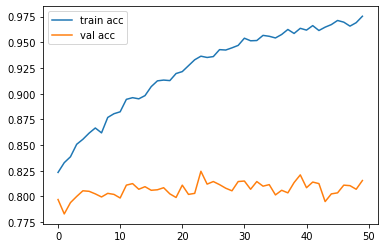

In [41]:
# ACCURACY PLOT
plt.plot(result.history['accuracy'], label = 'train acc')
plt.plot(result.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

In [42]:
# SAVE THE MODEL
model.save('D:/Datasets/cats_dogs/dataset/binary_classification_cat_and_dog.h5')